In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [5]:
device

device(type='cuda')

## 1. Данные

In [4]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [8]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../../data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
image, label = train_dataset[0]

In [11]:
image.shape

torch.Size([1, 28, 28])

In [12]:
label

tensor(5)

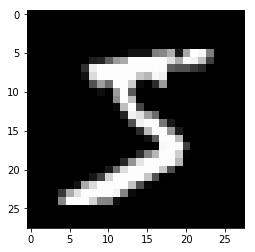

In [15]:
from matplotlib import pyplot as plt

plt.imshow(image.squeeze(), cmap='gray')

## Нейронная сеть

In [17]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)  
        self.fc4 = nn.Linear(hidden_size3, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

## 3. Лосс функция

In [18]:
# Loss
criterion = nn.CrossEntropyLoss()

## 4. optimizer и обучение

In [19]:
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.2656
Epoch [1/5], Step [200/600], Loss: 0.2665
Epoch [1/5], Step [300/600], Loss: 0.2510
Epoch [1/5], Step [400/600], Loss: 0.0931
Epoch [1/5], Step [500/600], Loss: 0.1805
Epoch [1/5], Step [600/600], Loss: 0.1412
Epoch [2/5], Step [100/600], Loss: 0.1039
Epoch [2/5], Step [200/600], Loss: 0.0825
Epoch [2/5], Step [300/600], Loss: 0.0564
Epoch [2/5], Step [400/600], Loss: 0.1128
Epoch [2/5], Step [500/600], Loss: 0.0490
Epoch [2/5], Step [600/600], Loss: 0.1145
Epoch [3/5], Step [100/600], Loss: 0.0487
Epoch [3/5], Step [200/600], Loss: 0.0819
Epoch [3/5], Step [300/600], Loss: 0.0694
Epoch [3/5], Step [400/600], Loss: 0.0219
Epoch [3/5], Step [500/600], Loss: 0.0429
Epoch [3/5], Step [600/600], Loss: 0.0534
Epoch [4/5], Step [100/600], Loss: 0.0611
Epoch [4/5], Step [200/600], Loss: 0.0360
Epoch [4/5], Step [300/600], Loss: 0.0421
Epoch [4/5], Step [400/600], Loss: 0.0277
Epoch [4/5], Step [500/600], Loss: 0.0478
Epoch [4/5], Step [600/600], Loss: